In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


5. Попробовать обработать как признаки наличие напитков, бургеров, картошка, товары которые штучные (шт в названии)
6. Размер напитка влияет?
7. Наличие туалета влияет ли на 1 и 0, фудкорт или что то еще

## Размер напиточков

In [ ]:
df = pd.read_parquet("train_dataset_hackaton2023_train.gzip")

In [ ]:
def filter_by_keyword(df, keywords_list):
    df = df[df['dish_name'].str.lower().str.contains('|'.join([keyword.lower() for keyword in keywords_list]))]
    return df

Латте
Flash
Кола Липтон Эвервесс Адреналин Эвервесс Капучино Кофе Дюшес чай Байкал Вода  Шейк Фрустайл Какао  Пиво Пепси Лимонад Мандарин  Сок  Балтика Эспрессо                                   Миринда Севен Энергет.нап.

In [ ]:
keywordsList = ["Латте", "Flash", "Кола", "Липтон", "Эвервесс", "Адреналин", "Эвервесс", "Капучино", "Кофе", "Дюшес", "чай", "Байкал", "Вода", "Шейк", "Фрустайл", "Какао", "Пиво", "Пепси", "Лимонад", "Мандарин", "Сок", "Балтика", "Эспрессо", "Миринда", "Севен", "Энергет.нап."]
# df = filter_by_keyword(df, keywordsList)

In [ ]:
values = [0.2, 0.3, 0.4, 0.5, 0.8,1]

In [ ]:
# print(df_2.dish_name.value_counts().to_string())

In [ ]:
print(df.dish_name.value_counts().to_string())

Кинг Фри мал                                    680496
Наггетсы (3 шт.)                                639692
Кинг Фри станд                                  461873
Соус Сырный                                     434150
Кинг Фри бол                                    367213
Чизбургер                                       353052
Воппер                                          301579
Чикенбургер новый                               289650
Сырные Медальоны (3 шт.)                        270053
Маффин                                          222002
Карт. Деревен. джун                             205860
Наггетсы (6 шт.)                                189768
Воппер Джуниор                                  168586
Соус Кисло-сладкий                              153932
Гранд Чиз                                       149444
Гамбургер                                       137337
Чикен Тар-Тар                                   136439
Влажная салфетка                                126589
Воппер Рол

In [ ]:
condition = "Латте|Flash|Кола|Липтон|Эвервесс|Адреналин|Эвервесс|Капучино|Кофе|Дюшес|чай|Байкал|Вода|Шейк|Фрустайл|Какао|Пиво|Пепси|Лимонад|Мандарин|Сок|Балтика|Эспрессо|Миринда|Севен|Энергет.нап"

In [ ]:
df['drink_size'] = np.select(
    [ df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,2"),
      df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,3"),
      df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,4|мал"),
      df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,5|станд"),
      df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,8|бол"),
      df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("1")], values, default=0)

<ipython-input-15-90a4d0172b0e>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  [ df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,2"),
<ipython-input-15-90a4d0172b0e>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,3"),
<ipython-input-15-90a4d0172b0e>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['dish_name'].str.contains(condition) & df['dish_name'].str.lower().str.contains("0,4|мал"),
<ipython-input-15-90a4d0172b0e>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['dish_name'].str.contains(condition) &

In [ ]:
print(df.drink_size.value_counts().to_string())

0.0    9970975
0.4     698004
0.5     688302
0.3     482889
0.8     241219
0.2      44758
1.0       3237


In [ ]:
ids_cols = ['customer_id', 'buy_post', 'startdatetime']
df_sum_agg_drinks = df.groupby(ids_cols, as_index=True).agg({"drink_size": ["sum"]})
df_sum_agg_drinks.columns = ["drink_size_total"]
df_sum_agg_drinks.reset_index(inplace=True)

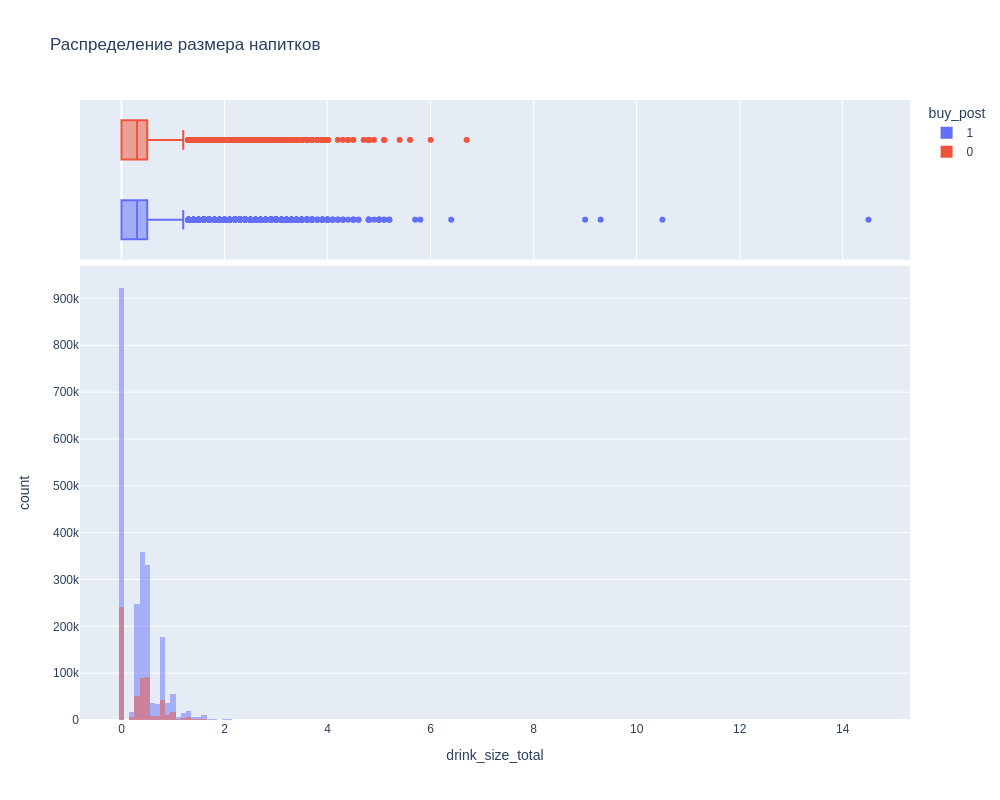

In [ ]:
import plotly.io as pio
import plotly.express as px

pio.renderers
pio.renderers.default = "png"

fig = px.histogram(
    df_sum_agg_drinks,
    x="drink_size_total",
    color="buy_post",
    barmode='overlay',
    marginal="box",
    width=1000,
    height=800,
    title="Распределение размера напитков",
)

fig.show()

## Формат реста

In [ ]:
print(df.format_name.value_counts().to_string())

Фудкорт без туалета                              4648951
Отдельно стоящий с внешней зоной                 2310987
Отдельно стоящий без внешней зоны                1814429
Отдельно стоящий                                 1663806
Фудкорт с туалетом                               1166460
Отдельно стоящий без внешней зоны без туалета     268701
Отдельно стоящий без туалета                      164444
Отдельно стоящий с внешн.зоной без туалета         91576
Не заполнено                                          30


In [ ]:
df['with_toilet'] = np.select(
    [ df['format_name'].str.lower().str.contains("без туалета"),
      df['format_name'].str.lower().str.contains("с туалетом")], [0, 1], default=1)

In [ ]:
print(df.with_toilet.value_counts().to_string())

1    6955712
0    5173672


In [ ]:
ids_cols = ['customer_id', 'buy_post', 'startdatetime']
df_sum_agg_toilet = df.groupby(ids_cols, as_index=True).agg({"with_toilet": ["mean"]})
df_sum_agg_toilet.columns = ["with_toilet_mean"]
df_sum_agg_toilet.reset_index(inplace=True)

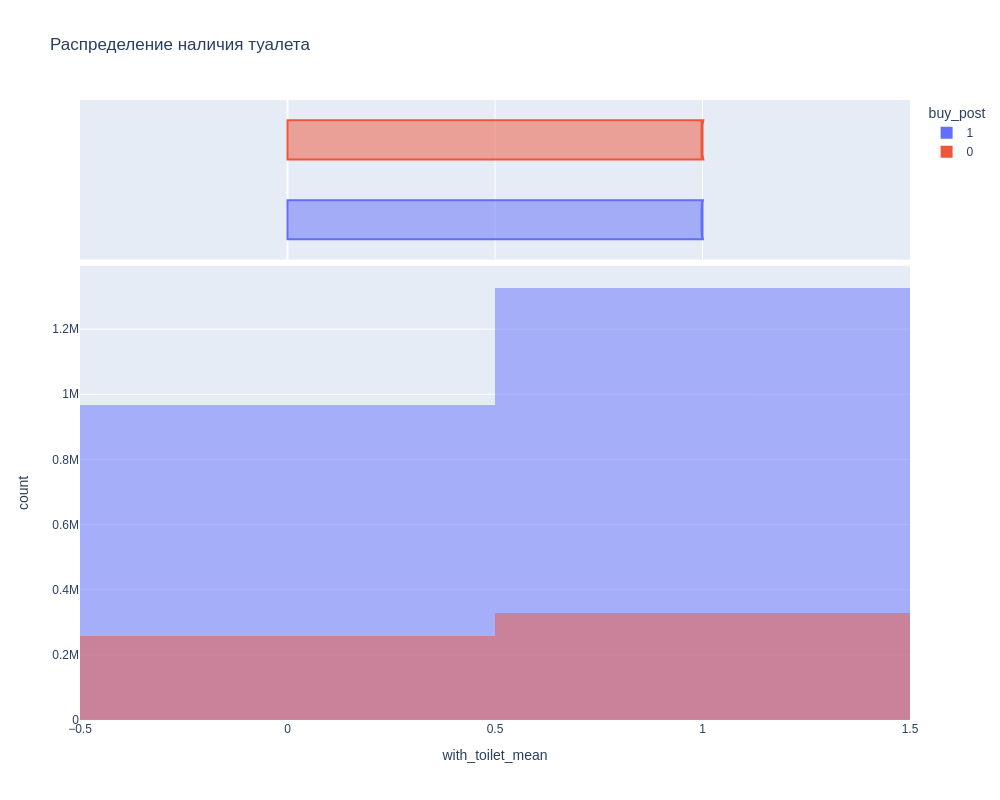

In [ ]:
import plotly.io as pio
import plotly.express as px

pio.renderers
pio.renderers.default = "png"

fig = px.histogram(
    df_sum_agg_toilet,
    x="with_toilet_mean",
    color="buy_post",
    marginal="box",
    width=1000,
    height=800,
    barmode='overlay',
    title="Распределение наличия туалета",
)

fig.show()

## Фудкорт или нет

In [ ]:
print(df.format_name.value_counts().to_string())

Фудкорт без туалета                              982047
Отдельно стоящий с внешней зоной                 446606
Отдельно стоящий без внешней зоны                353849
Отдельно стоящий                                 316966
Фудкорт с туалетом                               234331
Отдельно стоящий без внешней зоны без туалета     56232
Отдельно стоящий без туалета                      29894
Отдельно стоящий с внешн.зоной без туалета        16929
Не заполнено                                          7


In [ ]:
df['fudcort'] = np.select(
    [ df['format_name'].str.contains("Отдельно"),
      df['format_name'].str.contains("Фудкорт")], [0, 1], default=0)

In [ ]:
ids_cols = ['customer_id', 'buy_post', 'startdatetime']
df_sum_agg_fudcort = df.groupby(ids_cols, as_index=True).agg({"fudcort": ["mean"]})
df_sum_agg_fudcort.columns = ["fudcort_mean"]
df_sum_agg_fudcort.reset_index(inplace=True)

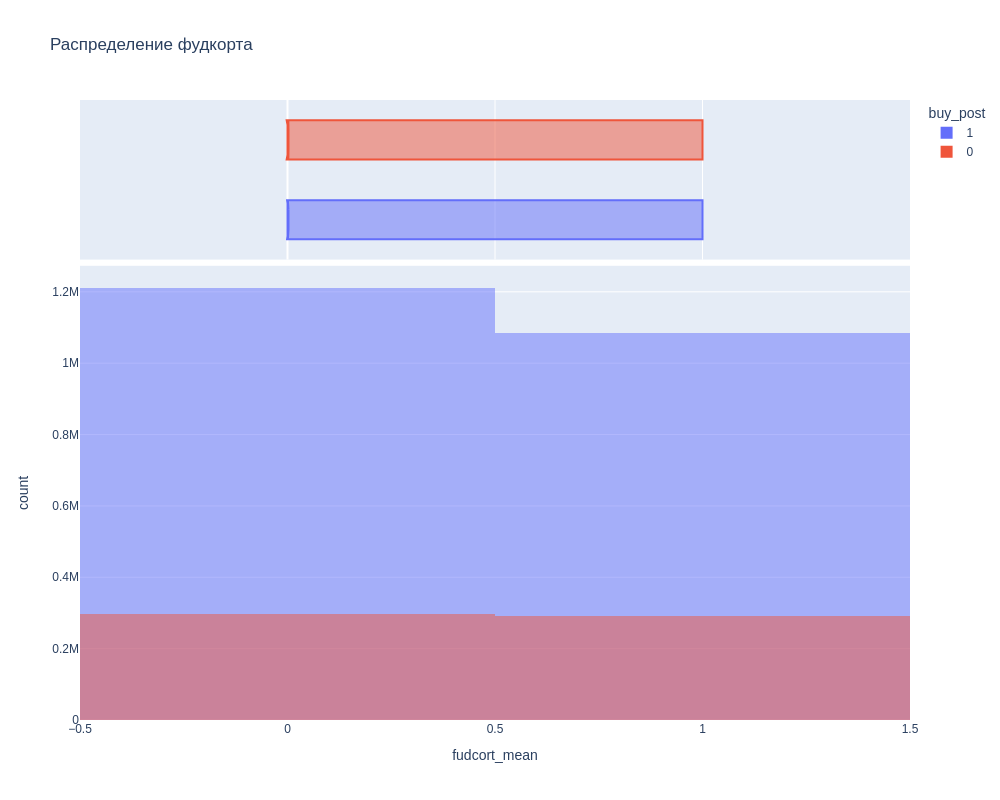

In [ ]:
import plotly.io as pio
import plotly.express as px

pio.renderers
pio.renderers.default = "png"

fig = px.histogram(
    df_sum_agg_fudcort,
    x="fudcort_mean",
    color="buy_post",
    marginal="box",
    width=1000,
    height=800,
    barmode='overlay',
    title="Распределение фудкорта",
)

fig.show()

## Штучное

In [ ]:
df['countable'] = np.select(
    [ df['dish_name'].str.lower().str.contains("шт")], [1], default=0)

In [ ]:
ids_cols = ['customer_id', 'buy_post', 'startdatetime']
df_sum_agg_countrt = df.groupby(ids_cols, as_index=True).agg({"countable": ["sum"]})
df_sum_agg_countrt.columns = ["countable_sum"]
df_sum_agg_countrt.reset_index(inplace=True)

In [ ]:
print(df.countable.value_counts().to_string())

0    10251923
1     1877461


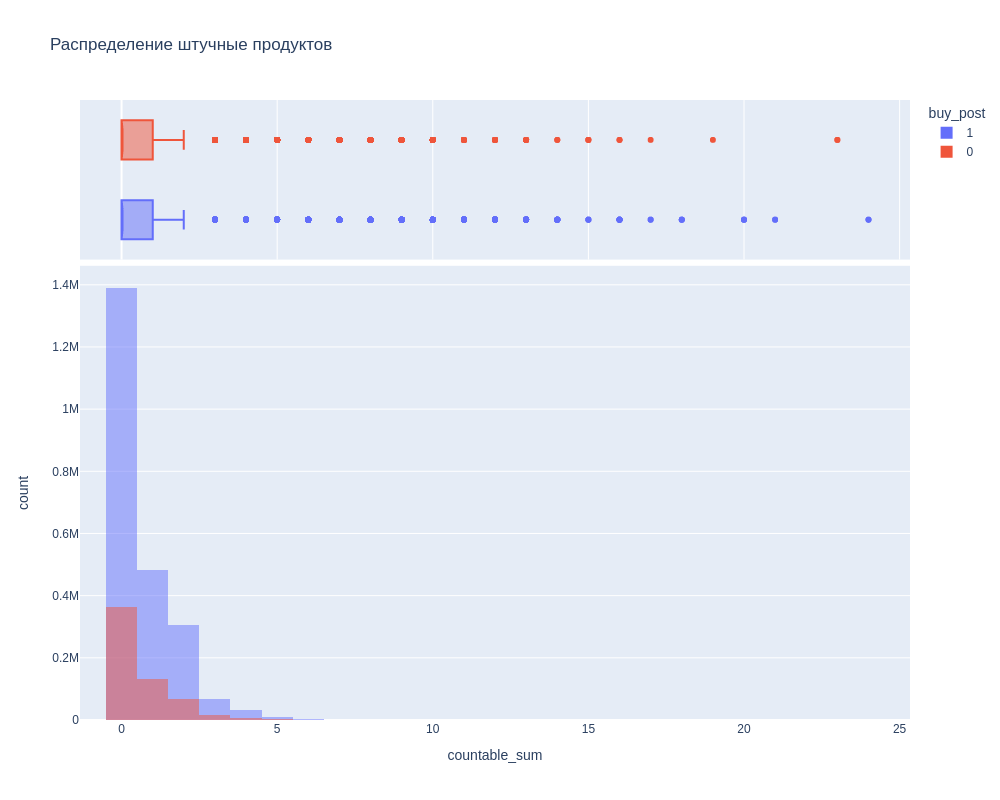

In [ ]:
import plotly.io as pio
import plotly.express as px

pio.renderers
pio.renderers.default = "png"

fig = px.histogram(
    df_sum_agg_countrt[df_sum_agg_countrt["countable_sum"] < 25],
    x="countable_sum",
    color="buy_post",
    marginal="box",
    width=1000,
    height=800,
    barmode='overlay',
    title="Распределение штучные продуктов",
)

fig.show()